# DBSCAN Parameters Explained

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that requires two main parameters: `eps` and `min_samples`. Here, we'll explain these parameters and a few additional ones that can be used to fine-tune the algorithm.

## Main Parameters

### 1. `eps` (epsilon)
- **Definition:** The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- **Role:** Defines the radius of the neighborhood around a point. Smaller values of `eps` result in smaller clusters, while larger values can merge clusters together.
- **How to Choose:** Use a k-distance graph to find the optimal `eps` value. Plot the distances of each point to its k-th nearest neighbor and look for the "elbow" point.

### 2. `min_samples`
- **Definition:** The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
- **Role:** Determines the minimum number of points required to form a dense region. Higher values of `min_samples` result in fewer, larger clusters, while lower values can create more, smaller clusters.
- **How to Choose:** A common heuristic is to set `min_samples` to be at least the number of dimensions plus one (e.g., for 2D data, `min_samples` should be at least 3).

## Additional Parameters

### 3. `metric`
- **Definition:** The distance metric used to calculate the distance between points.
- **Default:** `'euclidean'`
- **Options:** Can be any metric from `scipy.spatial.distance` (e.g., `'manhattan'`, `'cosine'`, etc.).
- **Role:** Defines how the distance between points is calculated. Different metrics can affect the shape and size of the clusters.

### 4. `algorithm`
- **Definition:** The algorithm used to compute the nearest neighbors.
- **Default:** `'auto'`
- **Options:** `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'`.
- **Role:** Determines the method used to find the nearest neighbors. `'auto'` will attempt to choose the best algorithm based on the input data.

### 5. `leaf_size`
- **Definition:** Leaf size passed to BallTree or KDTree.
- **Default:** `30`
- **Role:** Affects the speed of the construction and query of the tree. The optimal value depends on the nature of the problem.

### 6. `p`
- **Definition:** The power of the Minkowski metric to be used.
- **Default:** `2` (which is equivalent to the Euclidean distance).
- **Role:** Used when `metric` is set to `'minkowski'`. Defines the order of the norm of the Minkowski distance.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
# data processing 

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

x = df.drop('CustomerID' , axis = 1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [5]:
#compute the k nearest neighbours 

from sklearn.neighbors import NearestNeighbors
k = 3 #typically k = min_samples - 1
neigbours = NearestNeighbors(n_neighbors=k)
neighbours_fit = neigbours.fit(x_scaled)
distances , indices = neighbours_fit.kneighbors(x_scaled)

In [6]:
#sort the distances to the k-th nearest neighbour
distances = np.sort(distances[: , k-1] , axis = 0)

### Recommendation

Start with the Graph Approach: It’s quick and gives you a good initial estimate.

Use the Systematic Approach for Confirmation: If the elbow point is not clear or if you want to ensure precision, apply the systematic approach to validate your findings.

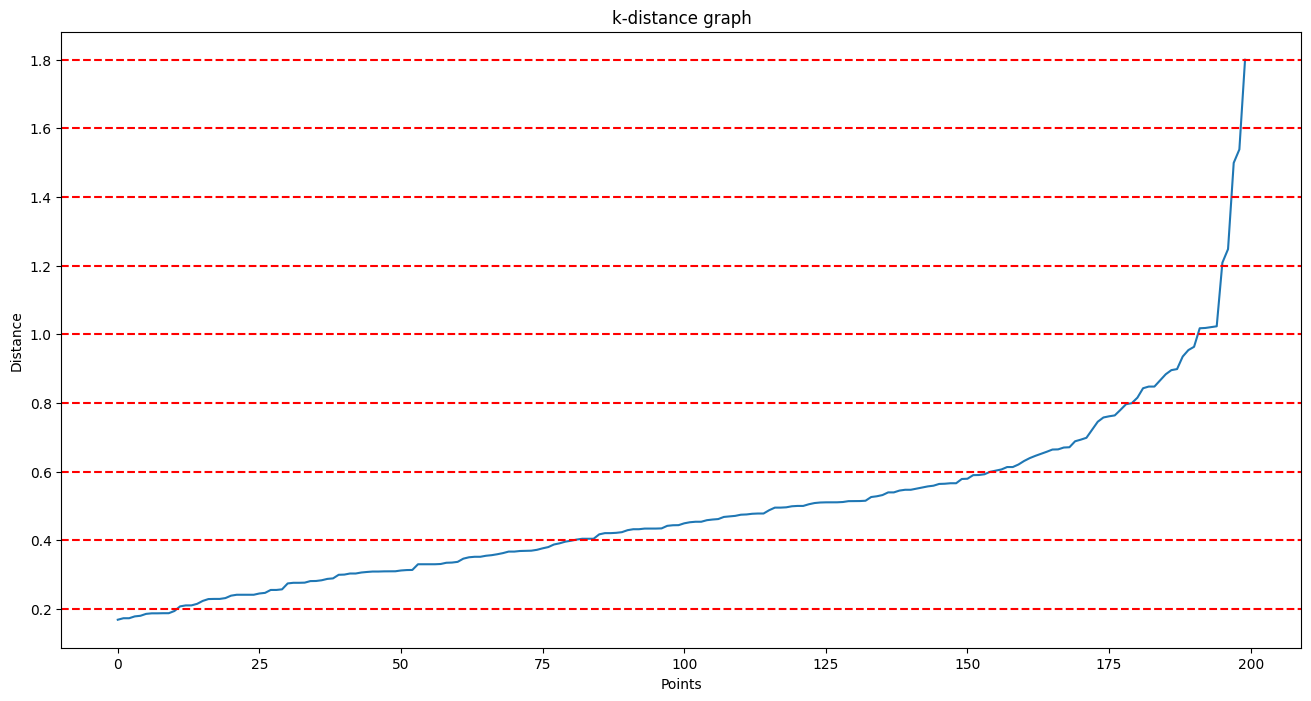

In [7]:
#plot the k_th nearest neighbour

plt.figure(figsize = (16,8))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('k-distance graph')
for y in [0.2 , 0.4 , 0.6 , 0.8 , 1 , 1.2 , 1.4 , 1.6 , 1.8]:
    plt.axhline(y=y, color='r', linestyle='--')
plt.show()

In [11]:
distances

array([0.16870371, 0.17303595, 0.17303595, 0.17840019, 0.18016078,
       0.18571321, 0.18732831, 0.18732831, 0.18767283, 0.18767283,
       0.1941078 , 0.20755771, 0.2104405 , 0.2104405 , 0.214878  ,
       0.22347432, 0.2288724 , 0.22929187, 0.22929187, 0.23170856,
       0.23879796, 0.24141183, 0.24141183, 0.24141183, 0.24141183,
       0.24511979, 0.24692789, 0.2554098 , 0.2554098 , 0.25717461,
       0.27441842, 0.27625138, 0.27625138, 0.27669913, 0.28120967,
       0.28151542, 0.28364754, 0.28760569, 0.2891022 , 0.29956979,
       0.30017135, 0.30329885, 0.30329885, 0.30623263, 0.30781334,
       0.30903427, 0.30903427, 0.30956288, 0.30968904, 0.30979242,
       0.31213499, 0.31331838, 0.31367563, 0.33025172, 0.33025172,
       0.3302779 , 0.3302779 , 0.33100969, 0.3345989 , 0.33518467,
       0.33722745, 0.34653306, 0.35054917, 0.35202371, 0.35202371,
       0.35500747, 0.35668846, 0.35942766, 0.36273041, 0.36713744,
       0.36713744, 0.368877  , 0.36927365, 0.36976183, 0.37230

Here we can see there is a sudden rise at 1.00 . we can consider it as our epsilon value 

In [8]:
#calculate the second derivative of the distances 
second_derivative = np.diff(distances , n = 2)

#find the index of maximum curvature
elbow_index = np.argmax(second_derivative) + 1

#optimal epsilon value
optimal_epsilon = distances[elbow_index]

print(f'Optimal Epsilon value : {optimal_epsilon}')

Optimal Epsilon value : 1.5384685848757307


### Guidelines for Choosing min_samples

Rule of Thumb:
A common starting point is to set min_samples to be at least the number of dimensions (D) in your dataset plus one: min_samples ≥ D + 1.
For example, if your dataset has 3 features, you might start with min_samples = 4.

Domain Knowledge:
Use any domain-specific knowledge you have about the data to set a reasonable value. For example, if you know that clusters should have at least 10 points to be meaningful, you might set min_samples = 10.

Experimentation:
Try different values of min_samples and evaluate the clustering results. Higher values can help in identifying more significant clusters and reducing noise.

In [9]:
# according to our dataset we have 4 features excluding customer id . so min_samples = 4
len(df.columns)

5

## Key Points to Consider

### Number of Clusters:
- Observe how the number of clusters changes with different `min_samples` values.
- Too few clusters might indicate that `min_samples` is too high, causing many points to be considered noise.
- Too many clusters might indicate that `min_samples` is too low, leading to over-segmentation.

### Noise Points:
- Noise points are typically labeled as `-1` in DBSCAN.
- A higher number of noise points might suggest that `min_samples` is too high.
- A lower number of noise points might suggest that `min_samples` is too low.

### Cluster Shape and Density:
- Look at the shape and density of the clusters.
- Ideally, clusters should be well-defined and dense, without too many scattered points.

## Example Interpretation

Let’s say you have the following graphs for different `min_samples` values:

### `min_samples = 3`
- **Clusters**: Several small clusters.
- **Noise Points**: Few noise points.
- **Interpretation**: `min_samples` might be too low, leading to over-segmentation.

### `min_samples = 4`
- **Clusters**: A moderate number of clusters.
- **Noise Points**: Some noise points.
- **Interpretation**: This might be a balanced value, with well-defined clusters and a reasonable number of noise points.

### `min_samples = 5`
- **Clusters**: Fewer, larger clusters.
- **Noise Points**: More noise points.
- **Interpretation**: `min_samples` might be slightly high, causing some points to be considered noise.

### `min_samples = 6`
- **Clusters**: Even fewer clusters.
- **Noise Points**: A significant number of noise points.
- **Interpretation**: `min_samples` might be too high, leading to many points being considered noise.

### `min_samples = 7`
- **Clusters**: Very few clusters.
- **Noise Points**: A large number of noise points.
- **Interpretation**: `min_samples` is likely too high, resulting in most points being considered noise.

## Choosing the Best Value

- **Balanced Clustering**: Look for a value of `min_samples` that provides a good balance between the number of clusters and noise points.
- **Domain Knowledge**: Use your domain knowledge to validate the clustering results. For example, if you expect a certain number of clusters based on prior knowledge, choose the `min_samples` value that aligns with this expectation.
